# Numerical Problem

Consider a cylinder with R=1000km, L=$\infty$, $\omega=0.18^\circ/s$, $T=2000s$. Rotation leads to apparent centrifugal acceleration, $F=1g$, for a surface $\omega R^2$. 

Parts **a)** and **b)** have been solved in tutorial.

**c)** Find trajectory **$h$ versus $\phi'$** of a projectile fired vertically upward with velocity $v' = \omega R$ in this non-inertial frame of reference. $h=R-r'$ is the altitude of the projectile and $\phi'$ is the angular position in azimuth relative to the launch point. **Calculate $\phi$ where it lands, relative to the launch point. Calculate the maximum height $H$ reached by the projectile.**

**d)** Calculate **$h$ versus $\phi'$** from a geometrical basis that an inertial observer would use to **predict** what a non-inertial observer would see. Compare results for c) and d). Show that $\phi$ and $H$ agree.

**Part c)**

In [1]:
# the following commands allow to produce 
# a nice pdf version of the notebook with figures:
from matplotlib.pyplot import *
%matplotlib inline
import numpy as np
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# populate the interactive namespace with the function 
# that solves ODEs
from scipy.integrate import odeint
from scipy.interpolate import interp1d

In [2]:
# the function defining the right-hand sides of the ODEs
def dy_dt(y, t, omega, fcf):
    y1, y2, y3, y4 = y
    # a special care should be taken here
    # to avoid the situation when the denominator y1=0.
    eps = 1e-12
    if abs(y1) < eps:
        y1 = eps
    dydt = [y2, 2.*omega*y1*y4+y1*(fcf*omega**2+y4**2),\
            y4, -(2.*y2/y1)*(omega+y4)]
    return dydt

In [3]:
T=2000 #s
omega = 2*np.pi/T  # angular velocity in rad/s
R = 1000000.  # radius in m

#Initial conditions

Fcf = 1. # the centrifugal Force is included

y0 = [R, -R*omega, 0.,0.]

In [4]:
# the integration time interval
t_start = 0.
t_end = 1000. # adjust t_end using the plot below
nt = 10000 # number of integration time steps

t = np.linspace(t_start, t_end, nt)

In [5]:
# solve the ODEs
# the angular velocity omega is defined above
sol = odeint(dy_dt, y0, t, args=(omega,Fcf))
#sol has [position, velocity, ]

In [6]:
h = R - sol[:,0] # 0=r'
phi = sol[:,2]*(180/np.pi) # 2=phi

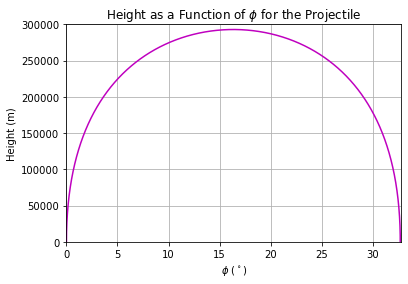

In [7]:
#Plotting h vs. phi

figure(1)
plot(phi,h,'m')
title("Height as a Function of $\phi$ for the Projectile")
xlabel("$\phi$ ($^\circ$)")
ylabel("Height (m)")
xlim(0,32.8)
ylim(0,300000)
grid()
show()

In [8]:
#Finding phi where h=0
#relative to phi=0 starting point
#and H, max height

phi_max=max(phi)
H=max(h)

print("The phi value when the bullet hits the ground is \
%.1f degrees." % phi_max)
print("The h value when the bullet is at max height is \
%.0f metres." % H)

The phi value when the bullet hits the ground is 32.7 degrees.
The h value when the bullet is at max height is 292893 metres.


**Part d)**

In order to calculate $\phi '(t)$, we use the following formula:
$$\phi '(t)=\arctan\biggl({\frac{\omega t}{1-\omega t}}\biggr)-\omega t$$

To calculate $r'(t)$, we use the following formula:
$$r'(t)=R[1-2\omega t(1-\omega t)]^{1/2}$$

Both formulas are provided in the Cassidy and Fowles textbook, equations 5.5.13 and 5.5.14, respectively. $h = R - r'(t)$.

In [9]:
phi1 = (np.arctan(omega*t/(1-omega*t))-omega*t)*(180/np.pi) #Formula with rad conversion
r1 = R*(1-2*omega*t*(1-omega*t))**(1/2)
h1 = R-r1

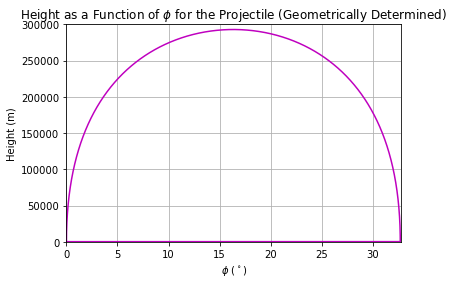

In [10]:
#Plotting h vs. phi from a gemoetrical basis

figure(2)
plot(phi1,h1,'m')
title("Height as a Function of $\phi$ for the Projectile \
(Geometrically Determined)")
xlabel("$\phi$ ($^\circ$)")
ylabel("Height (m)")
xlim(0,32.8)
ylim(0,300000)
grid()
show()

In [11]:
#Once again,
#Finding phi where h=0
#relative to phi=0 starting point
#and H, max height

phi_max1=max(phi1)
H1=max(h1)

print("The phi value when the bullet hits the ground \
is %.1f degrees." % phi_max1)
print("The h value when the bullet is at max height \
is %.0f metres." % H1)

The phi value when the bullet hits the ground is 32.7 degrees.
The h value when the bullet is at max height is 292893 metres.


In [12]:
print("The numerically-determined value for phi was \
found to be %.1f degrees." % phi_max)
print("The geometrically-determined value for phi was \
found to be %.1f degrees." % phi_max1)
print()
print("The numerically-determined h-value when the \
projectile was at max height was %.0f metres." % H)
print("The geometrically-determined h-value when the \
projectile was at max height was %.0f metres." % H1)
print()
print("Therefore, it can be seen that the values for \
parts c) and d) agree with one another.")

The numerically-determined value for phi was found to be 32.7 degrees.
The geometrically-determined value for phi was found to be 32.7 degrees.

The numerically-determined h-value when the projectile was at max height was 292893 metres.
The geometrically-determined h-value when the projectile was at max height was 292893 metres.

Therefore, it can be seen that the values for parts c) and d) agree with one another.
